## ex13-Using SQLite as a Time Series Database

SQLite supports five ***date*** and ***time*** functions as follows:
1. date(timestring, modifier, modifier, ...)
2. time(timestring, modifier, modifier, ...)
3. datetime(timestring, modifier, modifier, ...)
4. julianday(timestring, modifier, modifier, ...)
5. strftime(format, timestring, modifier, modifier, ...)

All five date and time functions take a time string as an argument. The time string is followed by zero or more modifiers. The strftime() function also takes a format string as its first argument. With these date and time functions, we can save time series data into a SQLite database so as to use SQLite as a time series database.

In this notebook, we will create a table to save man-made temperature data at different dates and times. You can presume that they are collected from some kind of temperature sensors.

This notebook will present:

- Practice date and time functions
- Create a temperature table and index
- Insert data into the temperature table
- Query

In [1]:
%load_ext sql

In [2]:
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

### 1. Connect to database

It was mentioned before the demo.db3 is extracted from a hydrological modelling. As a result, the data in each table is tidy and complete without NULL values. However, we can create a table with NULL values for demo.

In [3]:
%sql sqlite:///data/demo.db3

u'Connected: @data/demo.db3'

### 2. Play with date and time functions

You can find more example from [lang_datefunc](https://www.sqlite.org/lang_datefunc.html) or [sqlite_date_time](https://www.tutorialspoint.com/sqlite/sqlite_date_time.htm)

- Compute the current date.

In [4]:
%sql SELECT date('now');

 * sqlite:///data/demo.db3
Done.


date('now')
2018-10-17


- Compute the last day of the current month.

In [5]:
%sql SELECT date('now','start of month','+1 month','-1 day');

 * sqlite:///data/demo.db3
Done.


"date('now','start of month','+1 month','-1 day')"
2018-10-31


- Compute the date of the first Tuesday in October for the current year.

In [6]:
%sql SELECT date('now','start of year','+9 months','weekday 2');

 * sqlite:///data/demo.db3
Done.


"date('now','start of year','+9 months','weekday 2')"
2018-10-02


### 3. Create a table of time series temperature 

#### 3.1 Create table

only with two columns of timestamp and Temperature

In [7]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

#### 3.2 Create an index

For efficient querying, we'll want to index the timestamp column.

In [8]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

#### 3.3 Insert data

Make 500 rows of data and temperature ranges between 18 to 26.

In [9]:
def dt(days):
    return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
    timestamp = now - dt(days=(N_rows - i))
    temperature = uniform(18, 26)
    %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);  

 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 row

1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///da

1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///data/demo.db3
1 rows affected.
 * sqlite:///da

### 4. Play with time series table

#### 4.1 Simple Query

In [10]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///data/demo.db3
Done.


Date,Temperature
2017-06-04 14:57:28,19.1891167256
2017-06-05 14:57:28,25.5105711309
2017-06-06 14:57:28,24.4625398612
2017-06-07 14:57:28,20.8742018644
2017-06-08 14:57:28,23.9660706665


#### 4.2 Filter with a datetime

In [11]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2017-12-31 14:21:45'

Done.


Date,Temperature
2017-06-04 14:57:28.059000,19.1891167256
2017-06-05 14:57:28.059000,25.5105711309
2017-06-06 14:57:28.059000,24.4625398612
2017-06-07 14:57:28.059000,20.8742018644
2017-06-08 14:57:28.059000,23.9660706665
2017-06-09 14:57:28.059000,19.5525914543
2017-06-10 14:57:28.059000,21.909136455
2017-06-11 14:57:28.059000,25.5311195651
2017-06-12 14:57:28.059000,21.0259723504
2017-06-13 14:57:28.059000,21.0310871716


#### 4.3 Query data at a specific year

Use CAST string to integer as strftime returns a string.

In [12]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature 
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2017

Done.


Date,Temperature
2017-06-04 14:57:28.059000,19.1891167256
2017-06-05 14:57:28.059000,25.5105711309
2017-06-06 14:57:28.059000,24.4625398612
2017-06-07 14:57:28.059000,20.8742018644
2017-06-08 14:57:28.059000,23.9660706665
2017-06-09 14:57:28.059000,19.5525914543
2017-06-10 14:57:28.059000,21.909136455
2017-06-11 14:57:28.059000,25.5311195651
2017-06-12 14:57:28.059000,21.0259723504
2017-06-13 14:57:28.059000,21.0310871716


#### 4.5 Aggregate yearly

In [13]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year, 
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp) 

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2017,22.1059655333,25.9751954682,18.0207211838
2018,21.8701607129,25.9819347358,18.017765504


### 5. Visualization

Here we convert SQL query results into Pandas DataFrame.

In [14]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True) 
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///data/demo.db3
Done.


DatetimeIndex(['2017-06-04 14:57:28', '2017-06-05 14:57:28',
               '2017-06-06 14:57:28', '2017-06-07 14:57:28',
               '2017-06-08 14:57:28', '2017-06-09 14:57:28',
               '2017-06-10 14:57:28', '2017-06-11 14:57:28',
               '2017-06-12 14:57:28', '2017-06-13 14:57:28',
               ...
               '2018-10-07 14:57:28', '2018-10-08 14:57:28',
               '2018-10-09 14:57:28', '2018-10-10 14:57:28',
               '2018-10-11 14:57:28', '2018-10-12 14:57:28',
               '2018-10-13 14:57:28', '2018-10-14 14:57:28',
               '2018-10-15 14:57:28', '2018-10-16 14:57:28'],
              dtype='datetime64[ns]', name=u'date', length=500, freq=None)

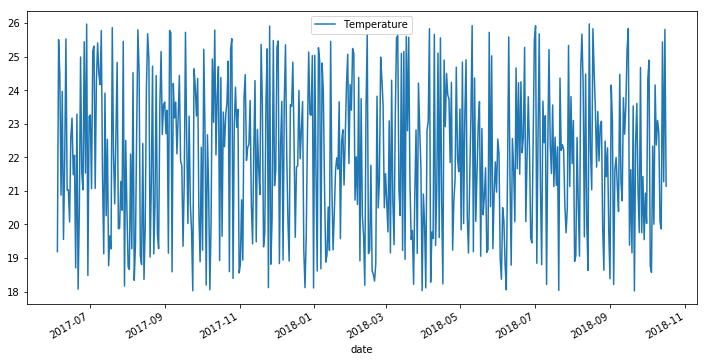

In [15]:
df.plot(figsize=(12, 6))

### Summary and References

Time series databases (TSDBs) are getting popular these days. There are quite a few [TSDbs](https://en.wikipedia.org/wiki/Time_series_database) such as InfluxDB, Graphite, Druid, Kairos, and Prometheus. With the SQLite date and time functions, we can save time series data into a SQLite database so as to use SQLite as a time series database. 

https://www.sqlite.org/lang_datefunc.html

https://www.tutorialspoint.com/sqlite/sqlite_date_time.htm